In [9]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Loading Data
df = pd.read_csv("../data/raw-data.csv", sep=';')
print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [11]:
# Converting Target Row to Numeric (for Heatmap)
df['Target_Numeric'] = df['Target'].str.strip().map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2})

In [12]:
# Shape & Data Types
print("Shape:", df.shape)
print("\nData Types:\n")
df.dtypes

Shape: (4424, 38)

Data Types:



Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [13]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [ ]:
# Missing Values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

# No missing values

Series([], dtype: int64)

In [17]:
# Duplicate Rows
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)

# No duplicate rows

Duplicate rows: 0


In [18]:
# Statistical Summary
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_Numeric
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.858273
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.693326
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [19]:
# Target Variable Distribution
target_col = "Target"

print(df[target_col].value_counts())

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [20]:
# Target Variable Distribution (Percentage)
print(df[target_col].value_counts(normalize=True) * 100)

Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_1432\2957622617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='viridis')


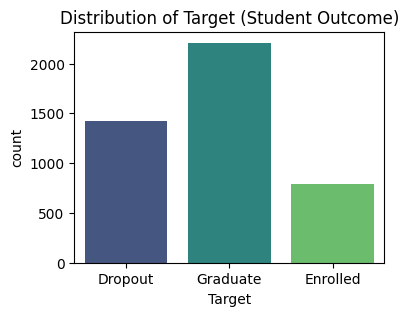

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [26]:
# Visualizing Target Distribution
plt.figure(figsize=(4, 3))
sns.countplot(x='Target', data=df, palette='viridis')
plt.title('Distribution of Target (Student Outcome)')
plt.show()

print(df['Target'].value_counts())


c:\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


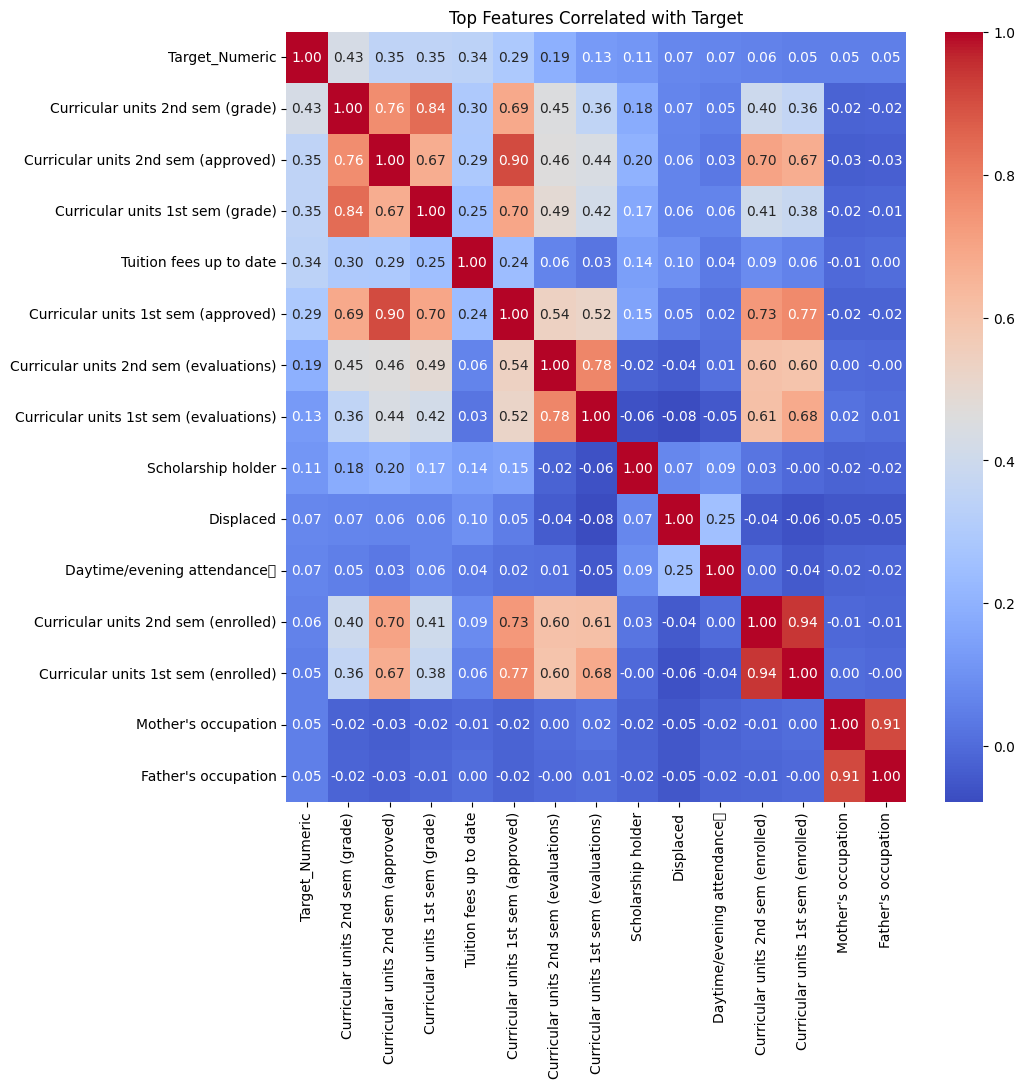

In [ ]:
# Top 15 Features correlation with target
plt.figure(figsize=(10, 10))
top_corr = df.corr(numeric_only=True)['Target_Numeric'].sort_values(ascending=False).head(15)
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Features Correlated with Target')
plt.show()


# Academic performance columns show the strongest positive correlation with Graduation.
# Scholarship holder status also shows a positive relationship, suggesting financial support plays a key role in student retention.
# Features with near-zero correlation can be considered for removal during the Feature Selection phase to reduce model complexity.

In [23]:
# Identifying Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

if "Target" in numerical_cols:
    numerical_cols.remove("Target")

C:\Users\Admin\AppData\Local\Temp\ipykernel_9044\1270430106.py:2: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


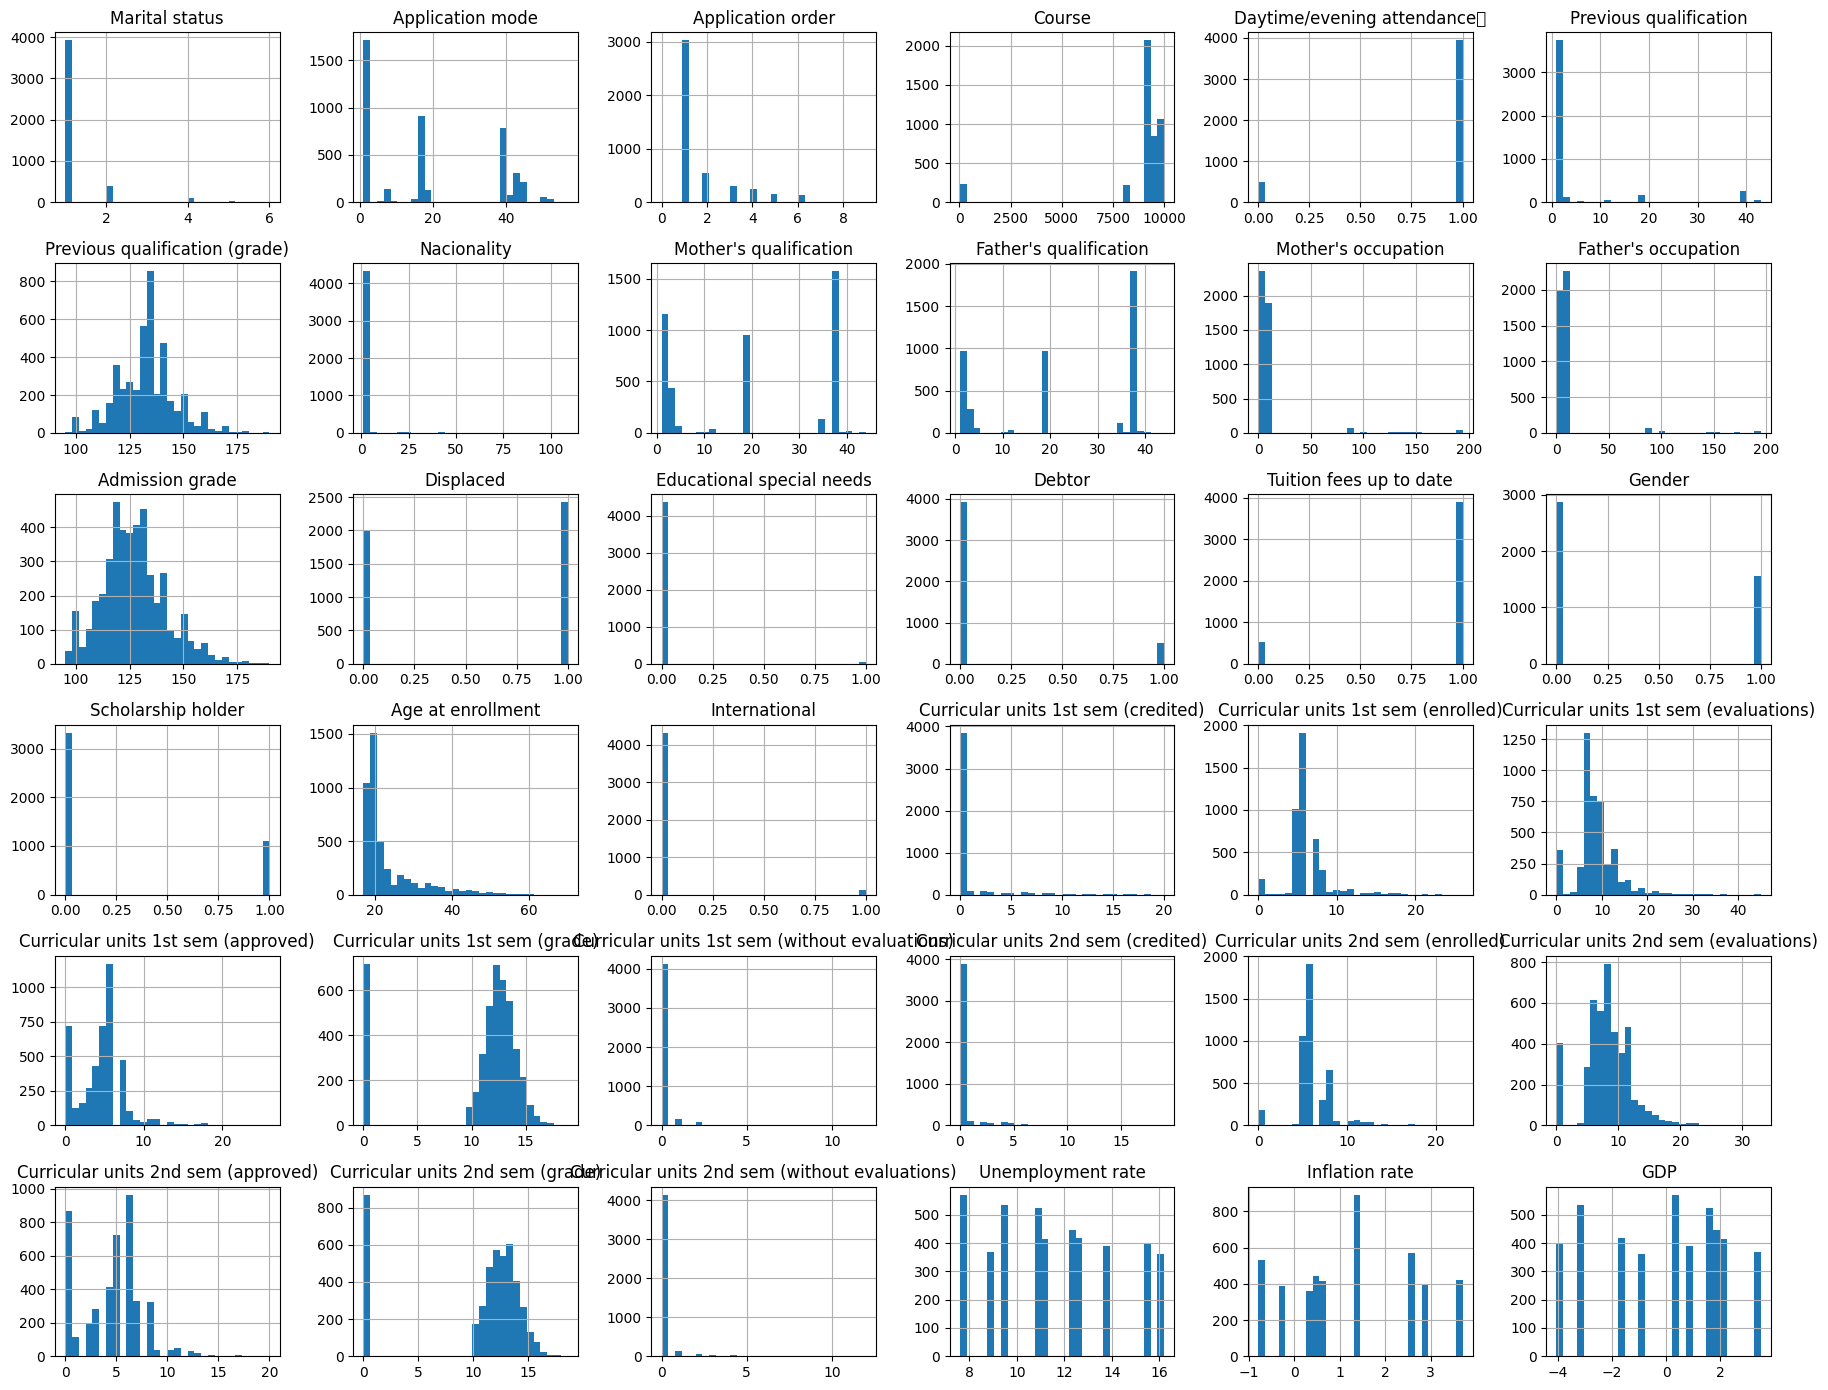

In [ ]:
# Histograms for Numerical Features
df[numerical_cols].hist(figsize=(18,14), bins=30)
plt.tight_layout()
plt.show()

In [ ]:
# Outlier Detection using IQR
outlier_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_summary[col] = outliers

pd.DataFrame.from_dict(outlier_summary, orient="index", columns=["Outlier_Count"])\
  .sort_values(by="Outlier_Count", ascending=False)

,Outlier_Count
Scholarship holder,1099
Curricular units 2nd sem (grade),877
Curricular units 1st sem (grade),726
Previous qualification,707
Curricular units 1st sem (credited),577
Application order,541
Curricular units 2nd sem (credited),530
Tuition fees up to date,528
Marital status,505
Debtor,503


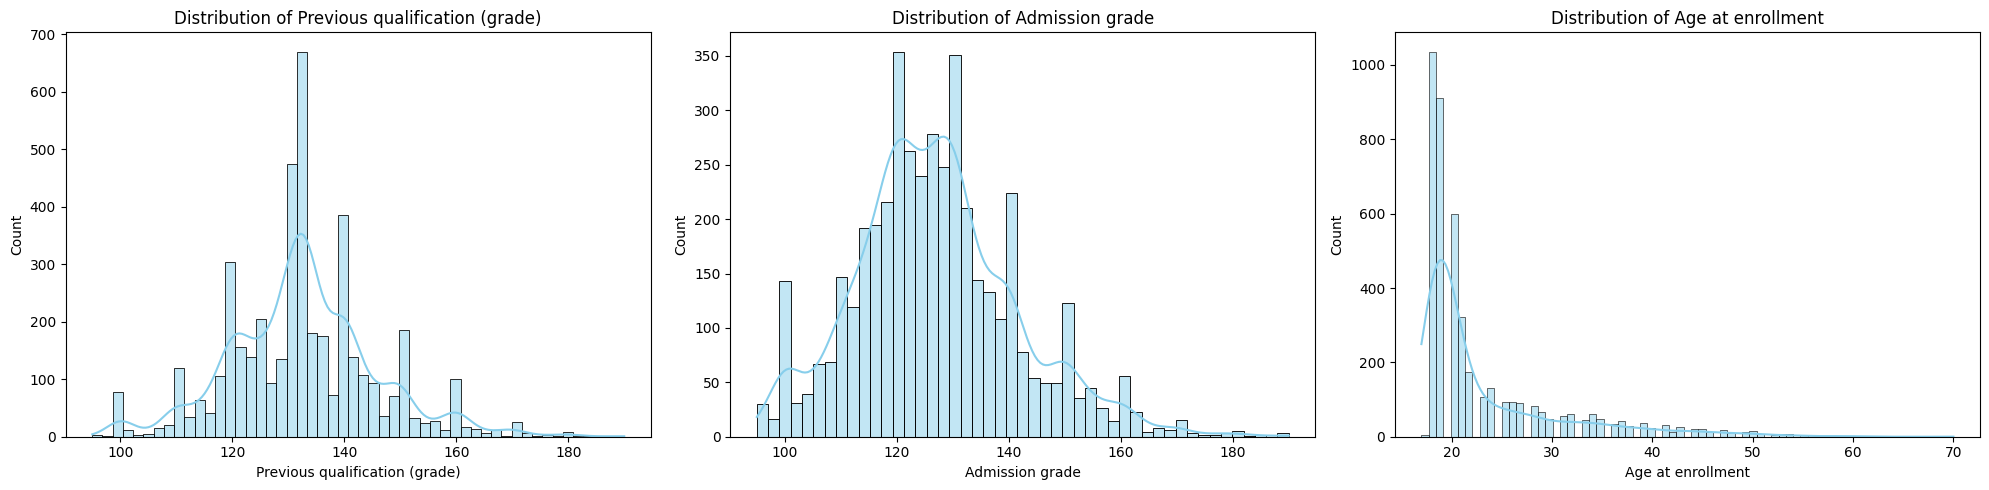

In [35]:
# Distribution Plots for Selected Numerical Features
dist_cols = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment']

plt.figure(figsize=(20, 5))
for i, col in enumerate(dist_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()